# Format Conversion

This notebook shows you how to convert the output of `osdatahub` into common formats for further processing. We will be
converting data from the OS API into a [GeoPandas GeoDataframe](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html)
 and a Shapely [GeometryCollection](https://shapely.readthedocs.io/en/stable/manual.html#collections).

## Table of Contents
1. [Access Data from API](#get-data)
2. [Geopandas](#geopandas)
3. [Shapely](#shapely)


## Getting the Data <a href=get-data>

We will be getting data from OS DataHub's [Features API](https://osdatahub.os.uk/docs/wfs/technicalSpecification), specifically
the OS Open Zoomstack for Local Buildings.

In [4]:
# first, we must import the correct libraries
import geopandas as gpd
from osdatahub import Extent
from osdatahub import FeaturesAPI 
import os

os.environ['PROJ_NETWORK'] = 'OFF'

In [5]:
# next, we define the API key, the DataHub product we need, and the area of interest

key = os.environ.get("OS_API_KEY") # can also swap this with your key as a string
product = "zoomstack_local_buildings"

# we are going to choose an extent in Avon, Somerset
W, S = (342730, 137700)
E, N = (347700, 141642)

crs = "EPSG:27700" # Specify the British National Grid coordinate reference system
extent = Extent.from_bbox((W, S, E, N), crs=crs)

In [6]:
# create a FeaturesAPI object containing the API key, the product, and the area of interest
local_buildings = FeaturesAPI(key, product, extent)

local_buildings_results = local_buildings.query(limit=100000)

## GeoPandas <a href=geopandas>

The FeaturesAPI query function returns a GeoJSON, making it simple to convert into other common data formats. GeoPandas
has a function called [from_features](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.from_features.html)
that will handle the conversion for us

In [7]:
local_buildings_gdf = gpd.GeoDataFrame.from_features(local_buildings_results['features'], crs=crs)

<AxesSubplot:>

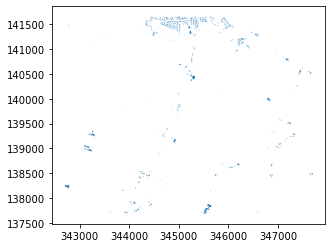

In [8]:
# plot the results
local_buildings_gdf.plot()


## Shapely <a href=shapely>

Similarly, it only takes a single line to convert the GeoJSON into a Shapely Geometry Collection. If we take the results from
the FeaturesAPI call that we implemented above, we can convert into a GeometryCollection by looping through each
geometry in the results.

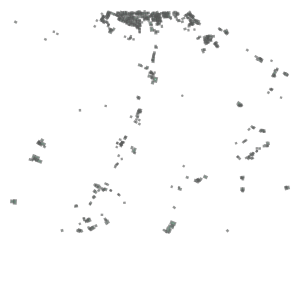

In [9]:
from shapely.geometry import shape, GeometryCollection

# NOTE: buffer(0) is a trick for fixing scenarios where polygons have overlapping coordinates
GeometryCollection([shape(feature["geometry"]).buffer(0) for feature in local_buildings_results["features"]])
